# Visualizing Earnings Based On College Majors
In this project, we'll explore how using the pandas plotting functionality along with the Jupyter notebook interface allows us to explore data quickly using visualizations. 

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo.

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

- Rank - Rank by median earnings (the dataset is ordered by this column).
- Major_code - Major code.
- Major - Major description.
- Major_category - Category of major.
- Total - Total number of people with major.
- Sample_size - Sample size (unweighted) of full-time.
- Men - Male graduates.
- Women - Female graduates.
- ShareWomen - Women as share of total.
- Employed - Number employed.
- Median - Median salary of full-time, year-round workers.
- Low_wage_jobs - Number in low-wage service jobs.
- Full_time - Number employed 35 hours or more.
- Part_time - Number employed less than 35 hours.

Using visualizations, we can start to explore questions from the dataset like:

- Do students in more popular majors make more money?
 - Using scatter plots
- How many majors are predominantly male? Predominantly female?
 - Using histograms
- Which category of majors have the most students?
 - Using bar plots
 
We'll explore how to do these and more while primarily working in pandas. Before we start creating data visualizations, let's import the libraries we need and remove rows containing null values.

In [2]:
import pandas as pd
%matplotlib inline

In [3]:
recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [4]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [5]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [6]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [7]:
raw_data_count = recent_grads.shape[0]
print(raw_data_count)

173


In [8]:
recent_grads = recent_grads.dropna()
cleaned_data_count = recent_grads.shape[0]
print(cleaned_data_count)

172


Now that we've [roughly] cleaned our data, lets plot 

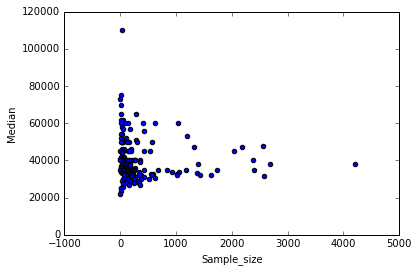

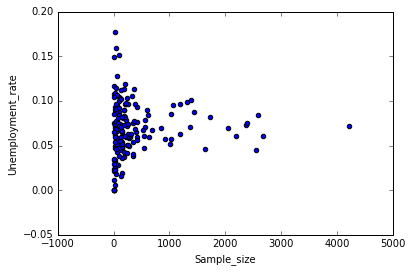

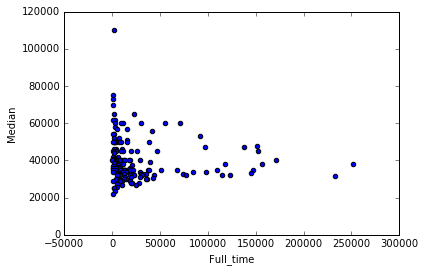

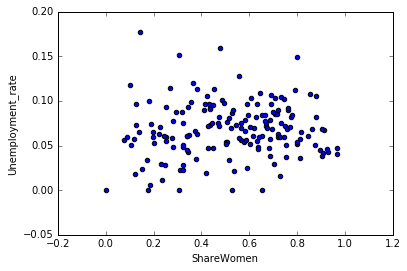

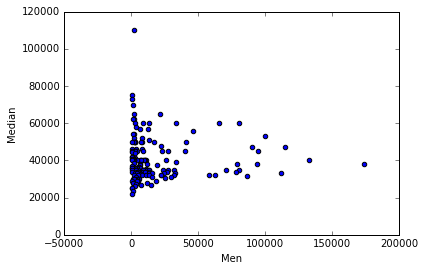

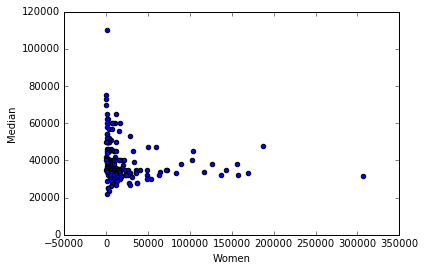

In [9]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter')
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')
recent_grads.plot(x='Full_time', y='Median', kind='scatter')
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')
recent_grads.plot(x='Men', y='Median', kind='scatter')
recent_grads.plot(x='Women', y='Median', kind='scatter')

Now that we've taken a look at our data, we can answer some basic questions:
- Do students in more popular majors make more money?
 - There appears to be no strong relationship between sample size and median income. If anything, there is a slight negative relationship between the more popular majors and median income level.
- Do students that majored in subjects that were majority female make more money?
 - If you look at the median income, when controlled for both males and females, majors that were predominantly male averaged a higher income level. This could be explained by a variety of factors, but also keep in mind that both sexes decrease in income level with popularity.
- Is there any link between the number of full-time employees and median salary?
 - Yes, the plot showing relationship between full-time employees and median salary shows a slightly negative correlation. As popularity increases, median salary decreases.

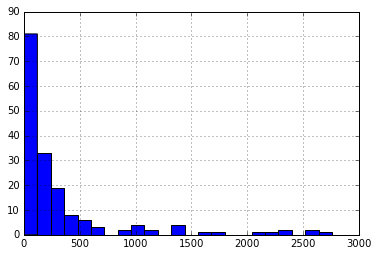

In [17]:
recent_grads['Sample_size'].hist(bins=25, range=(0,3000))

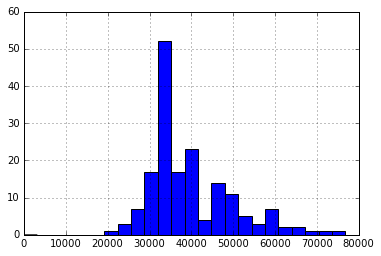

In [16]:
recent_grads['Median'].hist(bins=25, range=(0,80000))

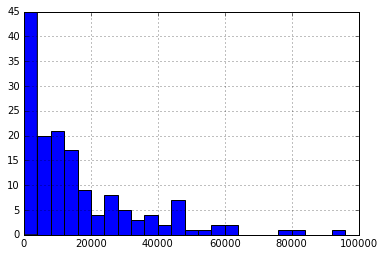

In [18]:
recent_grads['Employed'].hist(bins=25, range=(0,100000))

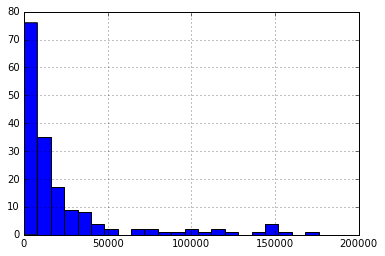

In [19]:
recent_grads['Full_time'].hist(bins=25, range=(0,200000))

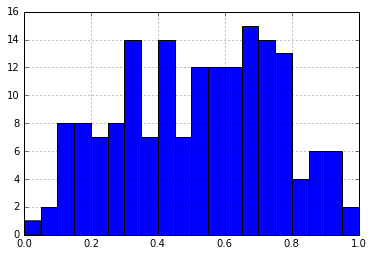

In [20]:
recent_grads['ShareWomen'].hist(bins=20, range=(0,1))

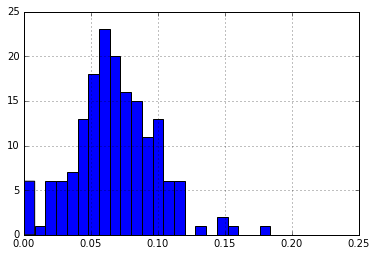

In [23]:
recent_grads['Unemployment_rate'].hist(bins=25, range=(0,.2))

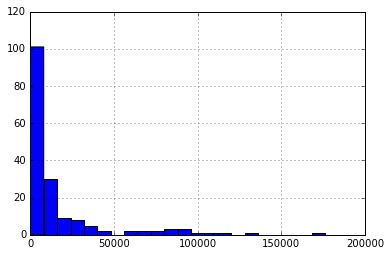

In [28]:
recent_grads['Men'].hist(bins=25, range=(0,200000))

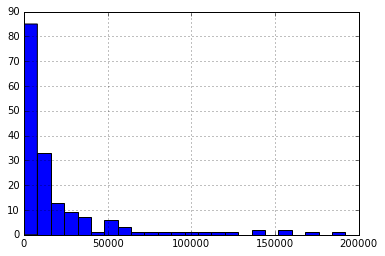

In [26]:
recent_grads['Women'].hist(bins=25, range=(0,200000))

Let's look at the following questions:

- What percent of majors are predominantly male? Predominantly female?
 - It seems that ~53% of majors are predominantly male and ~47% are female.
- What's the most common median salary range?
 - The most common median salary range is 32K-36K.

In [29]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcce54b3358>,
      dtype=object)

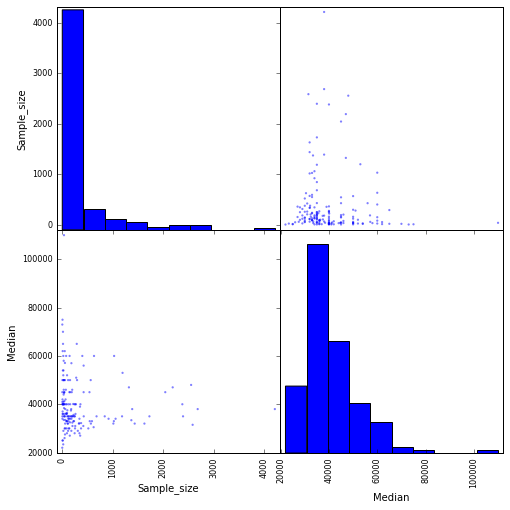

In [30]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(8,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcce4fa9e48>,
      dtype=object)

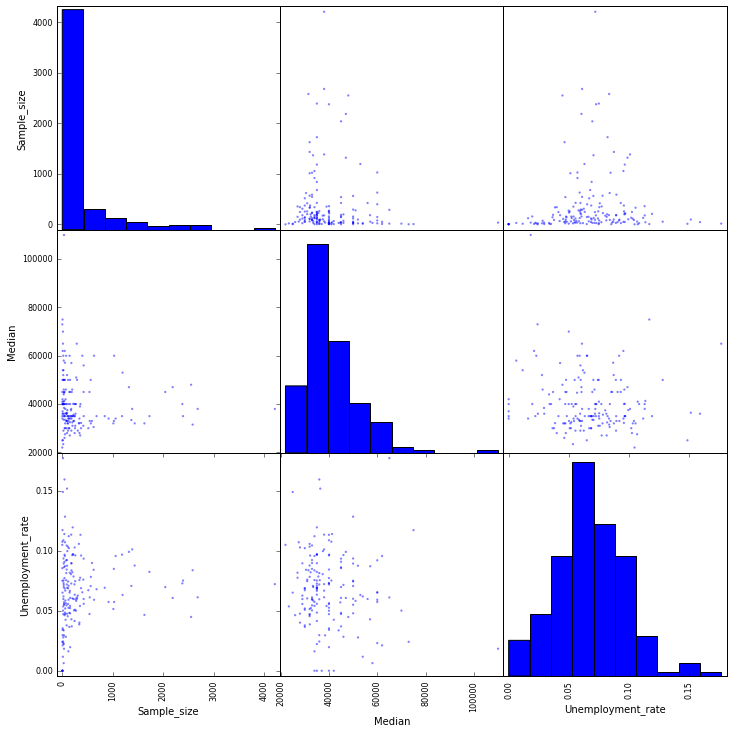

In [32]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(12,12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcce4defd30>,
      dtype=object)

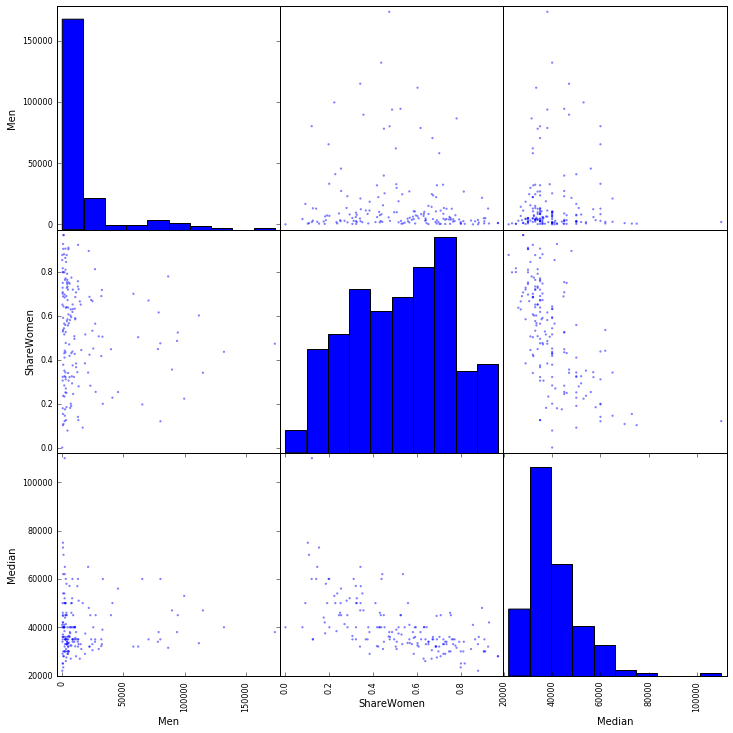

In [33]:
scatter_matrix(recent_grads[['Men', 'ShareWomen', 'Median']], figsize=(12,12))

It's hard to make sense of these plots, there isn't a very strong correlation, but in general women are less likely to be in a major that has a higher median earning.

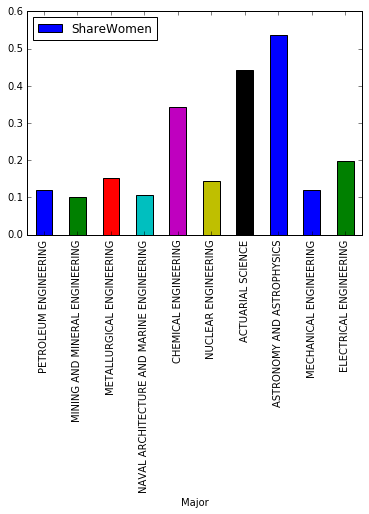

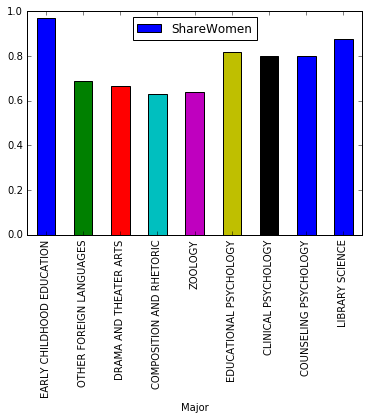

In [34]:
recent_grads[:10].plot(kind='bar', x='Major', y='ShareWomen')
recent_grads[163:].plot(kind='bar', x='Major', y='ShareWomen')

Of the highest earning majors, women are most likely to make up the astrophysics and astronomy section. Of the lowest earning majors, women are about equally represented in all categories.

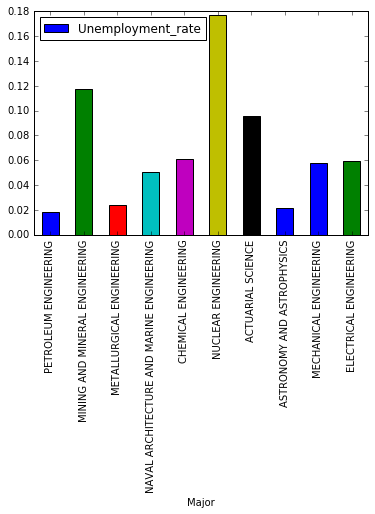

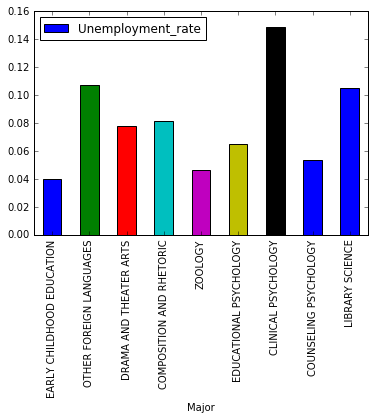

In [35]:
recent_grads[:10].plot(kind='bar', x='Major', y='Unemployment_rate')
recent_grads[163:].plot(kind='bar', x='Major', y='Unemployment_rate')

Looking at the unemployment rate in the top earning majors, nuclear engineering stands out as the highest. Of the lowest earning majors, the unemployment rate for clinical psychology is the highest.

## Conclusion
Why did I get a Bachelor's of Arts? Did no one show me this data first? I should've gotten a CS degree in the first place. 